In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', parse_dates=True, index_col=0)

In [3]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [4]:
x = df[['temp']]
y = df[['count']]
xneu=x.set_index('temp')
yneu=y.set_index('count')

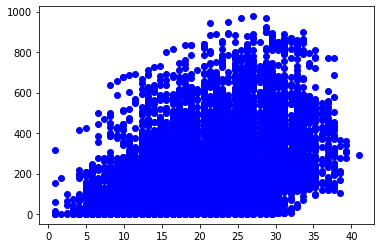

In [5]:
plt.plot(x, y, 'bo')
#plt.plot(x, ytrain, 'bo')

In [6]:
xarray = x.to_numpy()
yarray = y.to_numpy()

In [7]:
best_mse = np.Inf
best_a, best_b = None, None
for i in range(1000):
    a = np.random.random()*10
    b = np.random.random()*10
    ycalc= a*xarray +b
    mse = np.sum((ycalc-yarray)**2)/ycalc.shape[0]
    if mse <= best_mse:
        best_mse= mse
        best_a = a
        best_b = b

In [8]:
ycalc = best_a*x +best_b

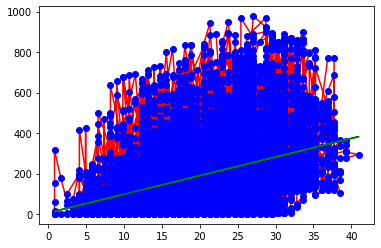

In [9]:
plt.plot(x, y, 'r-')
plt.plot(xarray, yarray, 'bo')
plt.plot(xarray,ycalc, 'g-')

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
best_mse

27705.735546952692

In [12]:
mean_squared_error(yarray, ycalc)
#xtrain=x.reshape(-1,1)

27705.735546952692

In [13]:
m = LinearRegression()

In [14]:
m.fit(xarray, yarray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
m.score(xarray, yarray) # this is a R^2, not an accuracy!!!!

0.15559367802794855

In [16]:
xarray

array([[ 9.84],
       [ 9.02],
       [ 9.02],
       ...,
       [13.94],
       [13.94],
       [13.12]])

In [17]:
y_pred = m.predict

In [18]:
y_pred

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [19]:
mcal = m.coef_, m.intercept_
mcal

(array([[9.17054048]]), array([6.04621296]))

In [242]:
#xx=x.reset_index()
#xarray = xx.to_numpy()
#y_pred=m.predict([xarray])

In [20]:
mcal2 = mcal[0]

In [21]:
mcal2

array([[9.17054048]])

In [22]:
acal = mcal2[0]
acal

array([9.17054048])

In [23]:
bcal = mcal[1]

In [24]:
bcal

array([6.04621296])

In [25]:
z=20

In [26]:
ycal= acal*xarray+bcal

In [27]:
ycal

array([[ 96.2843313 ],
       [ 88.7644881 ],
       [ 88.7644881 ],
       ...,
       [133.88354727],
       [133.88354727],
       [126.36370408]])

In [28]:
mean_squared_error(y, ycal)

27705.2238053288